In [1]:
import numpy as np
import pandas as pd
import pydot_ng as pydot
from IPython.display import Image 

# Taxi Cab Example

In [2]:
# Initialize the transition matrix
P = np.array([[0,0.7,0.3],[0.9,0,0.1],[0.5,0.5,0]])
P

array([[ 0. ,  0.7,  0.3],
       [ 0.9,  0. ,  0.1],
       [ 0.5,  0.5,  0. ]])

In [3]:
# Location at time 0 (could be probabilistics)
T0=np.array([1,0,0])
T0

array([1, 0, 0])

In [4]:
# probability of being at location i after 1 step
T1=np.dot(T0,P)
T1

array([ 0. ,  0.7,  0.3])

In [5]:
# probability of being at location i after 2 steps
T2 = np.dot(T1,P)
T2

array([ 0.78,  0.15,  0.07])

In [6]:
# iterate 50 times
result = []
T_i = T0
for i in range(1,50):
    result.append(T_i)
    T_i = np.dot(T_i,P)
pd.DataFrame(data=result, columns=['A','B','C'])

,A,B,C
0,1.000000,0.000000,0.000000
1,0.000000,0.700000,0.300000
2,0.780000,0.150000,0.070000
3,0.170000,0.581000,0.249000
4,0.647400,0.243500,0.109100
5,0.273700,0.507730,0.218570
6,0.566242,0.300875,0.132883
7,0.337229,0.462811,0.199960
8,0.516510,0.336040,0.147450
9,0.376161,0.435282,0.188557


In [7]:
# An auxiliary function for plotting directed graphs
#
# Input parameters
# ----------------
# m - n by n matrix
# labels - the labels associated with each node
# output_file - name of the .png output file
#
#
def plot_transition_matrix(m,labels,output_file):
    graph = pydot.Dot(graph_type='digraph')
    n = m.shape[0]
    nodes = dict()
    for i in range(n):
        nodes[i]=pydot.Node(labels[i] + ' (' + str(i) + ')')
        graph.add_node(nodes[i])
    for i in range(n):
        for j in range(n):
            if m[i,j]>0:
                graph.add_edge(pydot.Edge(nodes[i], nodes[j],label=str(m[i,j])))
    graph.write_png(output_file) 

In [8]:
# plot the graph to the file 
plot_transition_matrix(P,labels=['A','B','C'],output_file='temp.png')

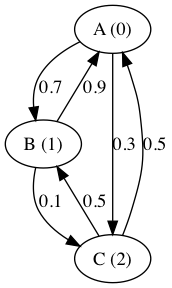

In [9]:
# display graph
Image('temp.png')

Recap
- initialized transition matrix
- computed iteratively 'stead state' probabilities
- plotted the graph